### configuração inicial e carregamento de dados

In [1]:
import pandas as pd
import os
import sys
import sqlite3
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

In [2]:
import matplotlib.font_manager as fm
try:
    fm._clear_cache()
    print("cache de fontes do matplotlib limpo com sucesso usando _clear_cache().")
except AttributeError:
    print("'_clear_cache()' não encontrado. tentando método alternativo de reconstrução de cache.")

print("por favor, certifique-se de que as fontes 'calistoga' e 'elsie' estão instaladas no seu sistema.")
print("em seguida, **reinicie o kernel jupyter/python**.")
print("o matplotlib reconstruirá o cache automaticamente ao ser usado novamente.")

print("\n**atenção:** após esta célula, você DEVE reiniciar o kernel do seu jupyter notebook/python para que as mudanças no cache de fontes sejam efetivadas.")

'_clear_cache()' não encontrado. tentando método alternativo de reconstrução de cache.
por favor, certifique-se de que as fontes 'calistoga' e 'elsie' estão instaladas no seu sistema.
em seguida, **reinicie o kernel jupyter/python**.
o matplotlib reconstruirá o cache automaticamente ao ser usado novamente.

**atenção:** após esta célula, você DEVE reiniciar o kernel do seu jupyter notebook/python para que as mudanças no cache de fontes sejam efetivadas.


#### configuração inicial e importações

In [3]:
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..', '..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"a raiz do projeto é: {project_root}")
print(f"a pasta 'ferramentas' existe em project_root? {os.path.exists(os.path.join(project_root, 'ferramentas'))}")

from ferramentas.leitura_e_escrita import ler_dados_brutos, salvar_dados_processados
from ferramentas.limpeza_geral import remover_linhas_vazias, converter_para_numerico, padronizar_nomes_colunas
from ferramentas.criacao_colunas import categorizar_horario_dia
from ferramentas.calculos_lucro import calcular_lucro_pesca

caminho_base_stardew_data = os.path.join(project_root, 'jogos', 'stardew-valley')
caminho_dados_brutos_pesca = os.path.join(caminho_base_stardew_data, 'dados-brutos', 'stardew-valley-pesca.csv')
caminho_dados_processados_pesca = os.path.join(caminho_base_stardew_data, 'dados-processados', 'stardew-valley-pesca-calculado.csv')
caminho_pasta_graficos_pesca = os.path.join(project_root, 'jogos', 'stardew-valley', 'gráficos', 'pesca')
caminho_banco_dados = os.path.join(project_root, 'analise_jogos.db')

os.makedirs(caminho_pasta_graficos_pesca, exist_ok=True)

print(f"caminho completo para dados brutos de pesca: {caminho_dados_brutos_pesca}")
print(f"caminho completo para dados processados de pesca: {caminho_dados_processados_pesca}")
print(f"caminho completo para a pasta de gráficos de pesca: {caminho_pasta_graficos_pesca}")
print(f"caminho completo para o banco de dados: {caminho_banco_dados}")

a raiz do projeto é: c:\Users\giovanna\Documents\github\analise-jogos
a pasta 'ferramentas' existe em project_root? True
caminho completo para dados brutos de pesca: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-brutos\stardew-valley-pesca.csv
caminho completo para dados processados de pesca: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-processados\stardew-valley-pesca-calculado.csv
caminho completo para a pasta de gráficos de pesca: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\gráficos\pesca
caminho completo para o banco de dados: c:\Users\giovanna\Documents\github\analise-jogos\analise_jogos.db


#### carregar dados brutos

In [4]:
if not os.path.exists(caminho_dados_brutos_pesca):
    print(f"erro: o arquivo '{caminho_dados_brutos_pesca} não foi encontrado.")
    df_pesca_bruto = pd.DataFrame()
else:
    print(f"\ncarregando dados brutos de pesca de: {caminho_dados_brutos_pesca}")
    df_pesca_bruto = ler_dados_brutos(caminho_dados_brutos_pesca)
    print(f"dados brutos de pesca carregados com sucesso!")


carregando dados brutos de pesca de: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-brutos\stardew-valley-pesca.csv
arquivo CSV 'c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-brutos\stardew-valley-pesca.csv' lido com sucesso.
dados brutos de pesca carregados com sucesso!


#### exploração inicial dos dados brutos

In [5]:
print("--- primeiras 5 linhas do dataframe ---")
print(df_pesca_bruto.head())

--- primeiras 5 linhas do dataframe ---
     peixe  preço de venda (normal)  preço de venda (prata)  \
0   baiacu                      200                     250   
1  anchova                       30                      37   
2  anchova                       30                      37   
3     atum                      100                     125   
4     atum                      100                     125   

   preço de venda (ouro)  preço de venda (íridio) localização hora início  \
0                    300                      400      oceano          12   
1                     45                       60      oceano    qualquer   
2                     45                       60      oceano    qualquer   
3                    150                      200      oceano           6   
4                    150                      200      oceano           6   

   hora fim    estação     clima  
0        16      verão       sol  
1  qualquer  primavera  qualquer  
2  qualquer  

In [6]:
print("\n--- informações sobre o dataframe ---")
print(df_pesca_bruto.info())


--- informações sobre o dataframe ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   peixe                    96 non-null     object
 1   preço de venda (normal)  96 non-null     int64 
 2   preço de venda (prata)   96 non-null     int64 
 3   preço de venda (ouro)    96 non-null     int64 
 4   preço de venda (íridio)  96 non-null     int64 
 5   localização              96 non-null     object
 6   hora início              96 non-null     object
 7   hora fim                 96 non-null     object
 8   estação                  96 non-null     object
 9   clima                    96 non-null     object
dtypes: int64(4), object(6)
memory usage: 7.6+ KB
None


In [7]:
print("\n--- dimensões do dataframe ---")
print(f"o dataframe possui {df_pesca_bruto.shape[0]} linhas e {df_pesca_bruto.shape[1]} colunas")


--- dimensões do dataframe ---
o dataframe possui 96 linhas e 10 colunas


In [8]:
print("\n--- nome das colunas ---")
print(df_pesca_bruto.columns)


--- nome das colunas ---
Index(['peixe', 'preço de venda (normal)', 'preço de venda (prata)',
       'preço de venda (ouro)', 'preço de venda (íridio)', 'localização',
       'hora início', 'hora fim', 'estação', 'clima'],
      dtype='object')


In [9]:
print("\n--- contagem de peixes por localização ---")
print(df_pesca_bruto['localização'].value_counts())


--- contagem de peixes por localização ---
localização
oceano                              32
rio                                 24
lago da montanha                    12
lago da floresta                     9
lagoa do bosque secreto              4
mina                                 4
pântano da bruxa                     3
o deserto                            2
os esgotos                           1
covil dos insetos mutantes           1
oceano da ilha gengibre              1
lagos e rios da ilha gengibre        1
cachoeira da floresta cinzaseiva     1
caverna do pirata                    1
Name: count, dtype: int64


In [10]:
print("\n--- contagem de peixes por horário ---")
print(df_pesca_bruto['hora início'].value_counts())


--- contagem de peixes por horário ---
hora início
6           46
qualquer    32
12           5
18           4
22           4
9            3
16           2
Name: count, dtype: int64


In [11]:
print("\n--- contagem de peixes por estação ---")
print(df_pesca_bruto['estação'].value_counts())


--- contagem de peixes por estação ---
estação
inverno      22
outono       20
todas        20
verão        19
primavera    15
Name: count, dtype: int64


In [12]:
print("\n--- contagem de peixes por clima ---")
print(df_pesca_bruto['clima'].value_counts())


--- contagem de peixes por clima ---
clima
qualquer    71
chuva       18
sol          5
vento        2
Name: count, dtype: int64


In [13]:
print("\n--- contagem de espécies de peixes ---")
print(df_pesca_bruto['peixe'].nunique())


--- contagem de espécies de peixes ---
48


### limpeza e padronização de dados

In [14]:
print("\niniciando a limpeza dos dados de pesca...")

df_pesca_limpo = remover_linhas_vazias(df_pesca_bruto)
print("\nlinhas vazias removidas!")

colunas_numericas = ['saúde restaurada (normal)', 'saúde restaurada (prata)',
       'saúde restaurada (ouro)', 'saúde restaurada (irídio)',
       'energia restaurada (normal)', 'energia restaurada (prata)',
       'energia restaurada (ouro)', 'energia restaurada (irídio)',
       'preço de venda (normal)', 'preço de venda (prata)',
       'preço de venda (ouro)', 'preço de venda (íridio)']
for col in colunas_numericas:
    if col in df_pesca_limpo.columns:
        df_pesca_limpo = converter_para_numerico(df_pesca_limpo, col)
        print("\ncolunas numéricas convertidas!")

df_pesca_limpo = padronizar_nomes_colunas(df_pesca_bruto)
print("\nnomes das colunas padronizados!")


iniciando a limpeza dos dados de pesca...
removidas 0 linhas vazias.

linhas vazias removidas!
aviso: coluna 'p' não encontrada no DataFrame para conversão.
aviso: coluna 'r' não encontrada no DataFrame para conversão.
aviso: coluna 'e' não encontrada no DataFrame para conversão.
aviso: coluna 'ç' não encontrada no DataFrame para conversão.
aviso: coluna 'o' não encontrada no DataFrame para conversão.
aviso: coluna ' ' não encontrada no DataFrame para conversão.
aviso: coluna 'd' não encontrada no DataFrame para conversão.
aviso: coluna 'e' não encontrada no DataFrame para conversão.
aviso: coluna ' ' não encontrada no DataFrame para conversão.
aviso: coluna 'v' não encontrada no DataFrame para conversão.
aviso: coluna 'e' não encontrada no DataFrame para conversão.
aviso: coluna 'n' não encontrada no DataFrame para conversão.
aviso: coluna 'd' não encontrada no DataFrame para conversão.
aviso: coluna 'a' não encontrada no DataFrame para conversão.
aviso: coluna ' ' não encontrada no 

In [15]:
print("\n--- informações dataframe limpo ---")
print(df_pesca_limpo.info())
print(df_pesca_limpo.head())


--- informações dataframe limpo ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   peixe                  96 non-null     object
 1   preco_de_venda_normal  96 non-null     int64 
 2   preco_de_venda_prata   96 non-null     int64 
 3   preco_de_venda_ouro    96 non-null     int64 
 4   preco_de_venda_iridio  96 non-null     int64 
 5   localizacao            96 non-null     object
 6   hora_inicio            96 non-null     object
 7   hora_fim               96 non-null     object
 8   estacao                96 non-null     object
 9   clima                  96 non-null     object
dtypes: int64(4), object(6)
memory usage: 7.6+ KB
None
     peixe  preco_de_venda_normal  preco_de_venda_prata  preco_de_venda_ouro  \
0   baiacu                    200                   250                  300   
1  anchova                     30

### cálculos de lucro e criação de novas colunas

In [16]:
print("\nrealizando cálculos específicos para peixes...")

colunas_venda_pesca = ['preco_de_venda_normal', 'preco_de_venda_prata', 'preco_de_venda_ouro', 'preco_de_venda_iridio']
df_pesca_calculado = calcular_lucro_pesca(df_pesca_limpo, colunas_venda=colunas_venda_pesca)

df_pesca_calculado['periodo'] = df_pesca_calculado['hora_inicio'].apply(categorizar_horario_dia)

print("cálculos de pesca concluídos. primeiras 5 linhas e colunas adicionadas:")
print(df_pesca_calculado.head())
print(df_pesca_calculado.columns)



realizando cálculos específicos para peixes...
cálculos de pesca concluídos. primeiras 5 linhas e colunas adicionadas:
     peixe  preco_de_venda_normal  preco_de_venda_prata  preco_de_venda_ouro  \
0   baiacu                    200                   250                  300   
1  anchova                     30                    37                   45   
2  anchova                     30                    37                   45   
3     atum                    100                   125                  150   
4     atum                    100                   125                  150   

   preco_de_venda_iridio localizacao hora_inicio  hora_fim    estacao  \
0                    400      oceano          12        16      verão   
1                     60      oceano    qualquer  qualquer  primavera   
2                     60      oceano    qualquer  qualquer     outono   
3                    200      oceano           6        19      verão   
4                    200      ocea

### salvamento e carregamento do banco de dados

In [17]:
print(f"\nsalvando dados processados de pesca em: {caminho_dados_processados_pesca}")
salvar_dados_processados(df_pesca_calculado, caminho_dados_processados_pesca)
print("dados processados de pesca salvos com sucesso!")


salvando dados processados de pesca em: c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-processados\stardew-valley-pesca-calculado.csv
DataFrame salvo como CSV em 'c:\Users\giovanna\Documents\github\analise-jogos\jogos\stardew-valley\dados-processados\stardew-valley-pesca-calculado.csv' com sucesso.
dados processados de pesca salvos com sucesso!


In [18]:
print(f"\ncarregando dados de pesca na tabela 'stardew_valley_pesca' do banco de dados: {caminho_banco_dados}")

conn = None
try: 
    conn = sqlite3.connect(caminho_banco_dados)
    print("conexão SQLite estabelecida")
    df_pesca_calculado.to_sql('stardew_valley_pesca', conn, if_exists='replace', index='False')
    print("dados de pesca carregados no SQLite com sucesso!")

    print("\nverificando dados no SQLite (primeiras 5 linhas da tabela de pesca):")
    df_check_pesca = pd.read_sql_query("SELECT * FROM stardew_valley_pesca LIMIT 5;", conn)
    print(df_check_pesca)

except sqlite3.Error as e:
    print(f"erro ao conectar ou carregar dados de pesca no SQLite: {e}")
except NameError:
    print("erro: 'caminho_banco_dados' não está definido")
finally:
    if conn:
        conn.close()
        print("conexão SQLite fechada")


carregando dados de pesca na tabela 'stardew_valley_pesca' do banco de dados: c:\Users\giovanna\Documents\github\analise-jogos\analise_jogos.db
conexão SQLite estabelecida
dados de pesca carregados no SQLite com sucesso!

verificando dados no SQLite (primeiras 5 linhas da tabela de pesca):
   False    peixe  preco_de_venda_normal  preco_de_venda_prata  \
0      0   baiacu                    200                   250   
1      1  anchova                     30                    37   
2      2  anchova                     30                    37   
3      3     atum                    100                   125   
4      4     atum                    100                   125   

   preco_de_venda_ouro  preco_de_venda_iridio localizacao hora_inicio  \
0                  300                    400      oceano          12   
1                   45                     60      oceano    qualquer   
2                   45                     60      oceano    qualquer   
3                  

### análises e visualizações

#### análises gerais


realizando análises e gerando visualizações...
conexão SQLite estabelecida


C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\3292253483.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_iridio, palette='pastel')


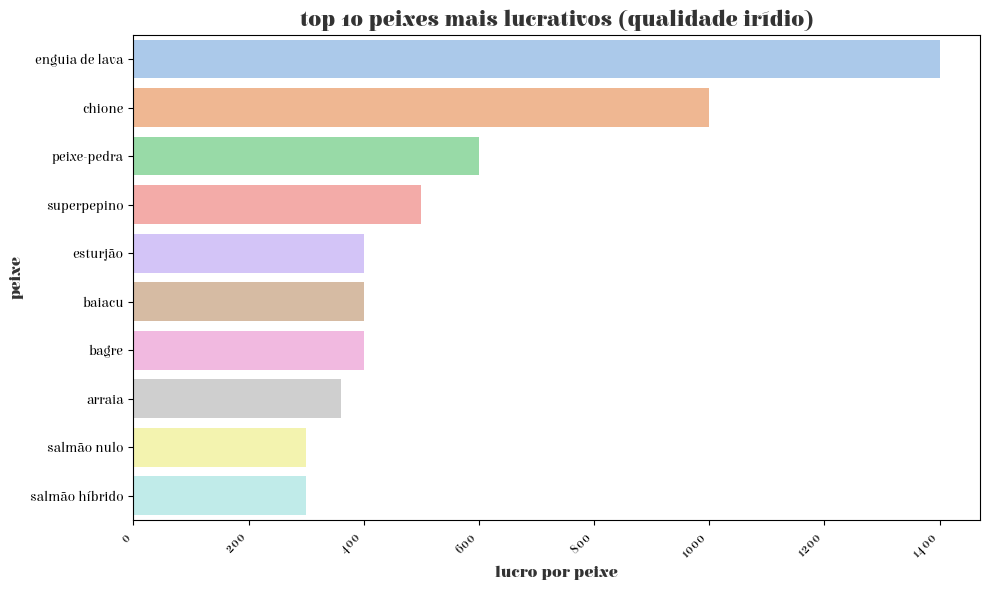

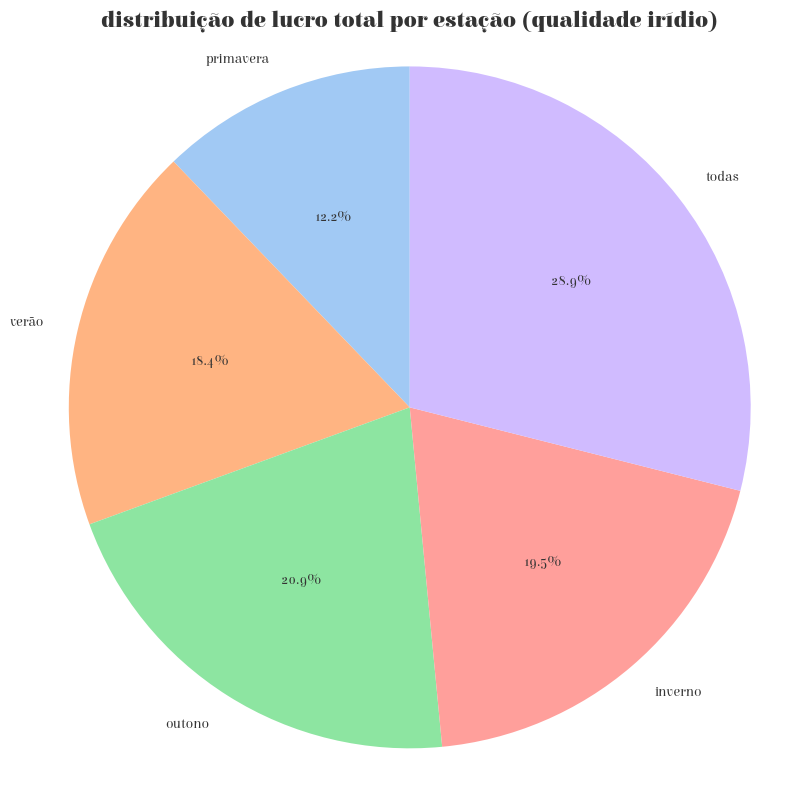

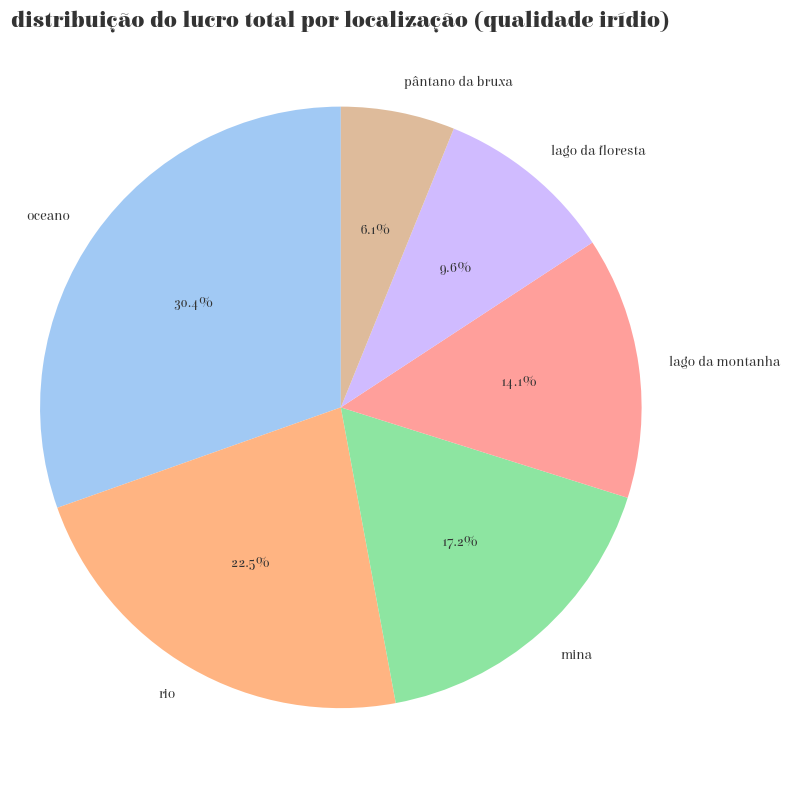

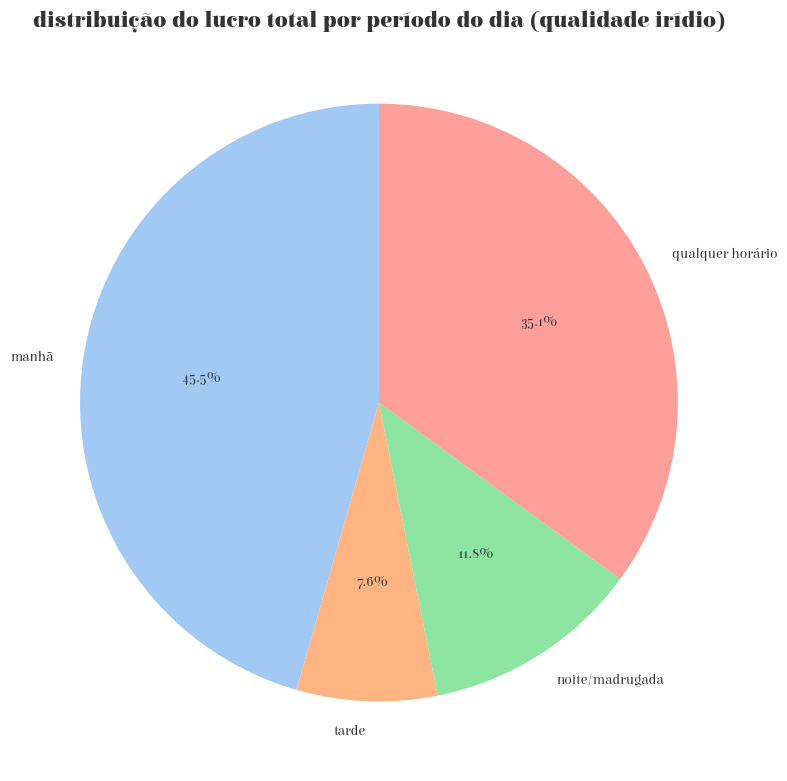

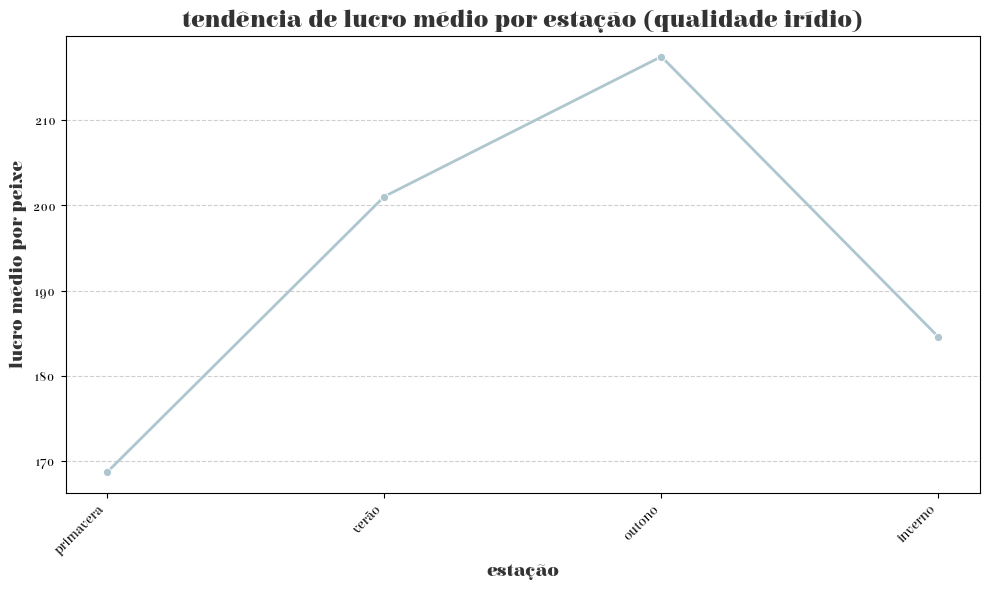

conexão SQLite fechada


In [19]:
print("\nrealizando análises e gerando visualizações...")

conn = None
try:
    conn = sqlite3.connect(caminho_banco_dados)
    print("conexão SQLite estabelecida")

    # gráfico 1: top 10 peixes mais lucrativos
    query_top_iridio = "SELECT peixe, lucro_por_peixe_iridio FROM stardew_valley_pesca GROUP BY peixe ORDER BY lucro_por_peixe_iridio DESC LIMIT 10"
    df_top_iridio = pd.read_sql_query(query_top_iridio, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_iridio, palette='pastel')
    plt.title(f'top 10 peixes mais lucrativos (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-10-peixes-iridio.png'))
    plt.show() 

    # gráfico 2: distribuição de lucro total por estação
    df_lucro_estacao_pizza = df_pesca_calculado.groupby('estacao')['lucro_por_peixe_iridio'].sum().reset_index()
    ordem_estacoes = ['primavera', 'verão', 'outono', 'inverno', 'todas']
    df_lucro_estacao_pizza['estacao'] = pd.Categorical(df_lucro_estacao_pizza['estacao'], categories=ordem_estacoes, ordered=True)
    df_lucro_estacao_pizza = df_lucro_estacao_pizza.sort_values('estacao')

    plt.figure(figsize=(8, 8))
    plt.pie(df_lucro_estacao_pizza['lucro_por_peixe_iridio'], labels=df_lucro_estacao_pizza['estacao'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), textprops={'fontfamily': 'Elsie', 'fontsize': 10, 'color': '#333'})
    plt.title('distribuição de lucro total por estação (qualidade irídio)', fontfamily='Elsie', fontsize=16, fontweight='bold', color='#333')
    plt.axis('equal') 
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'pizza-lucro-estacao.png'))
    plt.show()

    # gráfico 3: distribuição do lucro total por localização
    df_lucro_localizacao_pizza = df_pesca_calculado.groupby('localizacao')['lucro_por_peixe_iridio'].sum().reset_index()
    df_lucro_localizacao_pizza = df_lucro_localizacao_pizza.sort_values('lucro_por_peixe_iridio', ascending=False).head(6)

    plt.figure(figsize=(8, 8))
    plt.pie(df_lucro_localizacao_pizza['lucro_por_peixe_iridio'], labels=df_lucro_localizacao_pizza['localizacao'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), textprops={'fontfamily': 'Elsie', 'fontsize': 10, 'color': '#333'})
    plt.title('distribuição do lucro total por localização (qualidade irídio)', fontfamily='Elsie', fontsize=16, fontweight='bold', color='#333')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'pizza-lucro-localizacao.png'))
    plt.show()

    # gráfico 4: distribuição do lucro total por período do dia
    df_lucro_periodo_pizza = df_pesca_calculado.groupby('periodo')['lucro_por_peixe_iridio'].sum().reset_index()
    ordem_periodos = ['manhã', 'tarde', 'noite/madrugada', 'qualquer horário']
    df_lucro_periodo_pizza['periodo'] = pd.Categorical(df_lucro_periodo_pizza['periodo'], categories=ordem_periodos, ordered=True)
    df_lucro_periodo_pizza = df_lucro_periodo_pizza.sort_values('periodo')

    plt.figure(figsize=(8, 8))
    plt.pie(df_lucro_periodo_pizza['lucro_por_peixe_iridio'], labels=df_lucro_periodo_pizza['periodo'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), textprops={'fontfamily': 'Elsie', 'fontsize': 10, 'color': '#333'})
    plt.title('distribuição do lucro total por período do dia (qualidade irídio)', fontfamily='Elsie', fontsize=16, fontweight='bold', color='#333')
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'pizza-lucro-periodo.png'))
    plt.show()

    # gráfico 5: tendência de lucro médio por estação
    query_lucro_por_estacao = "SELECT estacao, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao IN ('primavera', 'verão', 'outono', 'inverno') GROUP BY estacao ORDER BY CASE estacao WHEN 'primavera' THEN 1 WHEN 'verão' THEN 2 WHEN 'outono' THEN 3 WHEN 'inverno' THEN 4 WHEN 'todas' THEN 5 ELSE 6 END;"
    df_lucro_por_estacao = pd.read_sql_query(query_lucro_por_estacao, conn)

    plt.figure(figsize=(10, 6))
    sns.lineplot(x='estacao', y='lucro_medio_iridio', data=df_lucro_por_estacao, marker='o', color='#AEC6CF', linewidth=2)
    plt.title('tendência de lucro médio por estação (qualidade irídio)', fontfamily='Elsie', fontsize=18, fontweight='bold', color='#333')
    plt.xlabel('estação', fontfamily='Elsie', fontsize=14, fontweight='bold', color='#333')
    plt.ylabel('lucro médio por peixe', fontfamily='Elsie', fontsize=14, fontweight='bold', color='#333')
    plt.xticks(fontfamily='Elsie', rotation=45, ha='right')
    plt.yticks(fontfamily='Elsie')
    plt.grid(axis='y', linestyle='--', alpha=0.6) 
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'lucro-por-estacao.png'))
    plt.show()

except sqlite3.Error as e:
    print(f"erro no SQLite: {e}")
except pd.errors.DatabaseError as e:
    print(f"erro ao ler do banco de dados com pandas: {e}")
except Exception as e:
    print(f"ocorreu um erro inesperado: {e}")

finally:
    if conn:
        conn.close()
        print("conexão SQLite fechada")

#### análises da primavera


realizando análises e gerando visualizações...
conexão SQLite estabelecida


C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2407948286.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_primavera, palette='pastel')


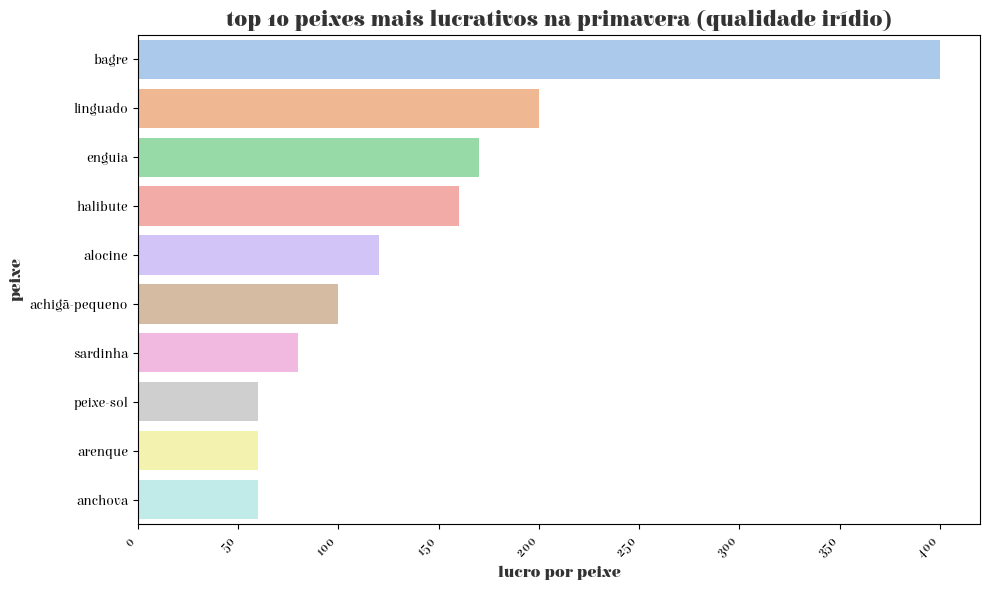

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2407948286.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='localizacao', data=df_top_localizacao_primavera, palette='pastel')


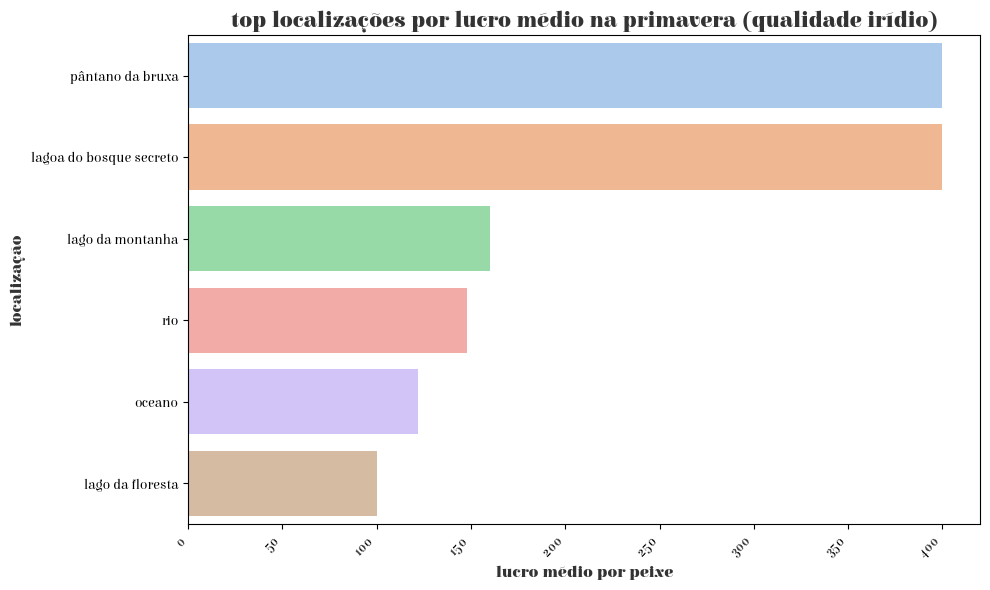

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2407948286.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='periodo', data=df_top_periodo_primavera, palette='pastel')


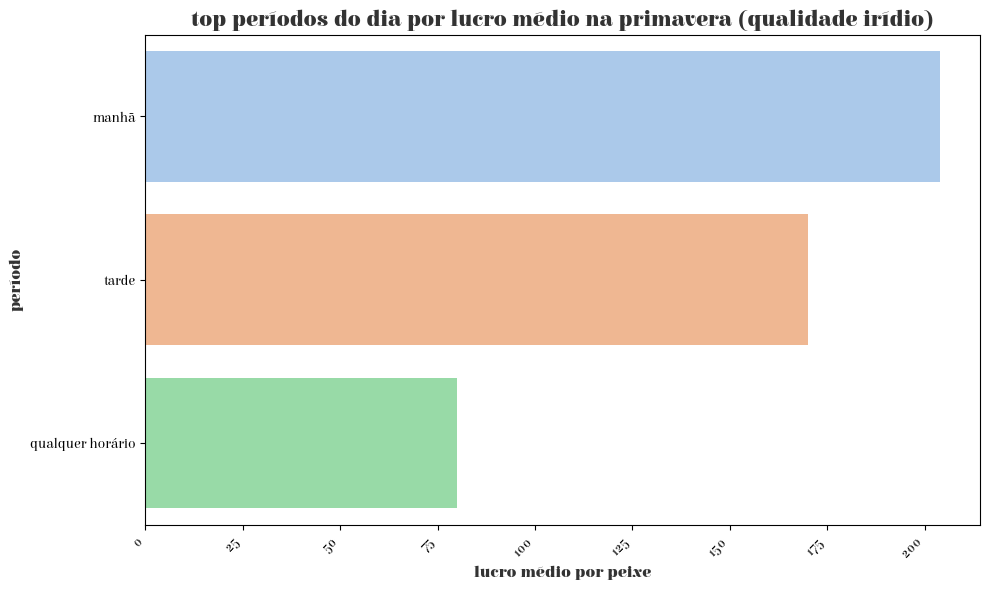

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2407948286.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='clima', data=df_top_clima_primavera, palette='pastel')


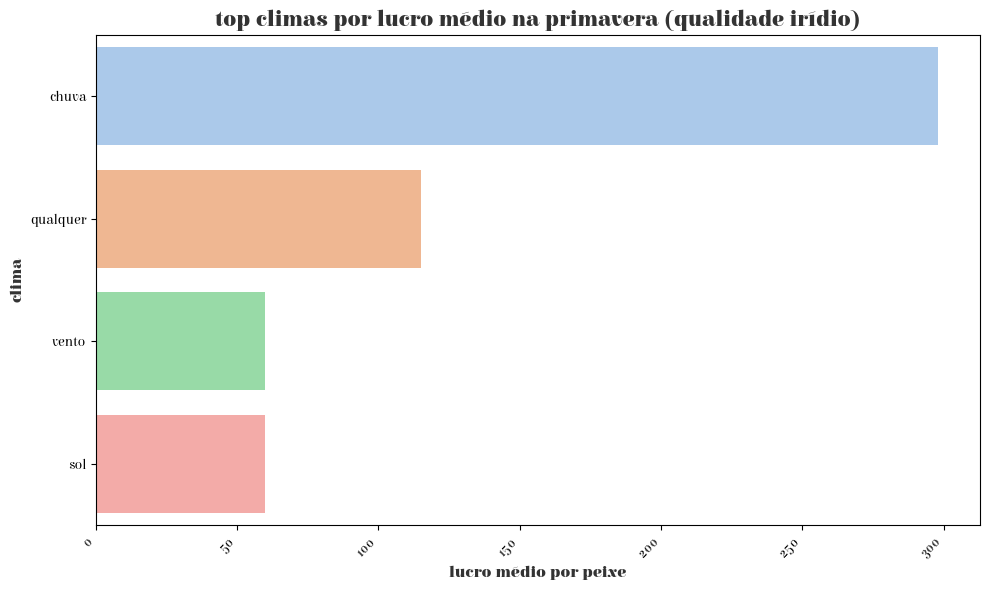

conexão SQLite fechada


In [20]:
print("\nrealizando análises e gerando visualizações...")

conn = None
try:
    conn = sqlite3.connect(caminho_banco_dados)
    print("conexão SQLite estabelecida")

    # gráfico 6: top 10 peixes mais lucrativos na primavera
    query_top_primavera = "SELECT peixe, lucro_por_peixe_iridio FROM stardew_valley_pesca WHERE estacao='primavera' GROUP BY peixe ORDER BY lucro_por_peixe_iridio DESC LIMIT 10"
    df_top_primavera = pd.read_sql_query(query_top_primavera, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_primavera, palette='pastel')
    plt.title(f'top 10 peixes mais lucrativos na primavera (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-10-peixes-primavera.png'))
    plt.show() 

    # gráfico 7: top localizações por lucro médio na primavera
    query_top_localizacao_primavera = "SELECT localizacao, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='primavera' GROUP BY localizacao ORDER BY lucro_medio_iridio DESC;"
    df_top_localizacao_primavera = pd.read_sql_query(query_top_localizacao_primavera, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='localizacao', data=df_top_localizacao_primavera, palette='pastel')
    plt.title(f'top localizações por lucro médio na primavera (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('localização', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-localizacoes-primavera.png'))
    plt.show() 

    # gráfico 8: top períodos do dia por lucro médio na primavera
    query_top_periodo_primavera = "SELECT periodo, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='primavera' GROUP BY periodo ORDER BY lucro_medio_iridio DESC;"
    df_top_periodo_primavera = pd.read_sql_query(query_top_periodo_primavera, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='periodo', data=df_top_periodo_primavera, palette='pastel')
    plt.title(f'top períodos do dia por lucro médio na primavera (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('período', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-periodos-primavera.png'))
    plt.show()

    # gráfico 9: top climas por lucro médio na primavera
    query_top_clima_primavera = "SELECT clima, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='primavera' GROUP BY clima ORDER BY lucro_medio_iridio DESC;"
    df_top_clima_primavera = pd.read_sql_query(query_top_clima_primavera, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='clima', data=df_top_clima_primavera, palette='pastel')
    plt.title(f'top climas por lucro médio na primavera (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('clima', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-climas-primavera.png'))
    plt.show()

except sqlite3.Error as e:
    print(f"erro no SQLite: {e}")
except pd.errors.DatabaseError as e:
    print(f"erro ao ler do banco de dados com pandas: {e}")
except Exception as e:
    print(f"ocorreu um erro inesperado: {e}")

finally:
    if conn:
        conn.close()
        print("conexão SQLite fechada")

#### análises do verão


realizando análises e gerando visualizações...
conexão SQLite estabelecida


C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\1352516737.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_verao, palette='pastel')


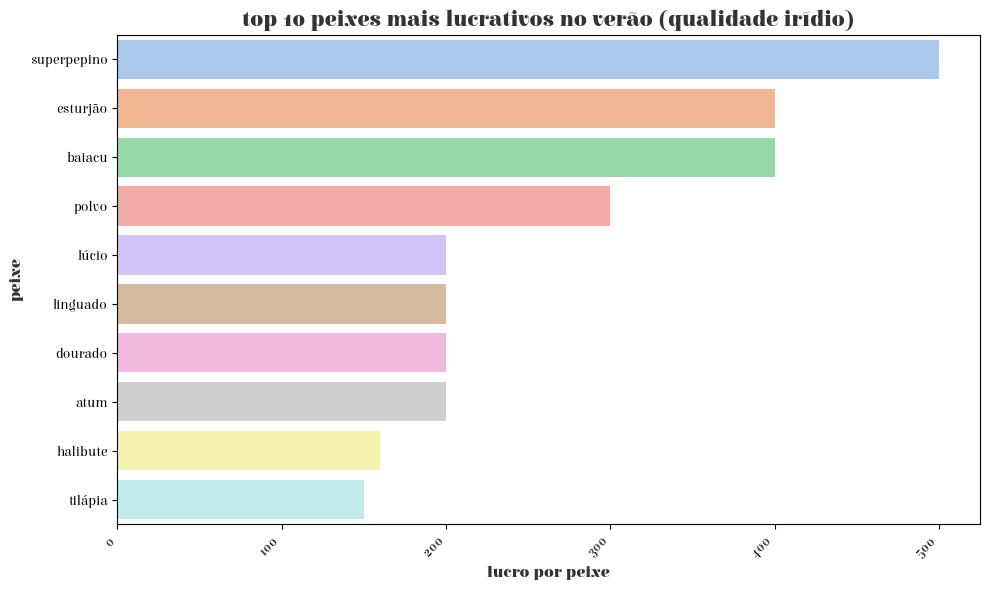

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\1352516737.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='localizacao', data=df_top_localizacao_verao, palette='pastel')


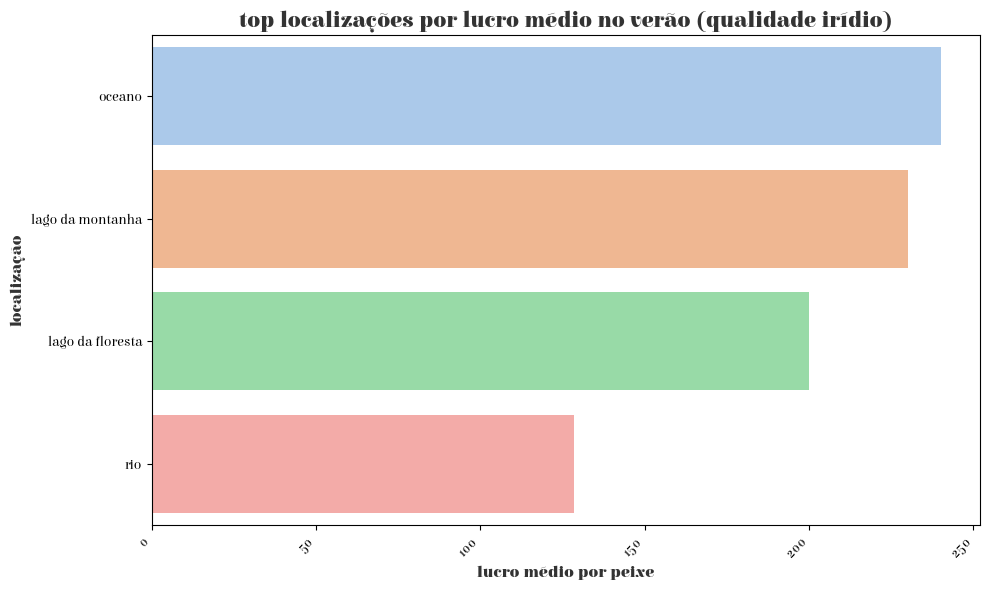

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\1352516737.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='periodo', data=df_top_periodo_verao, palette='pastel')


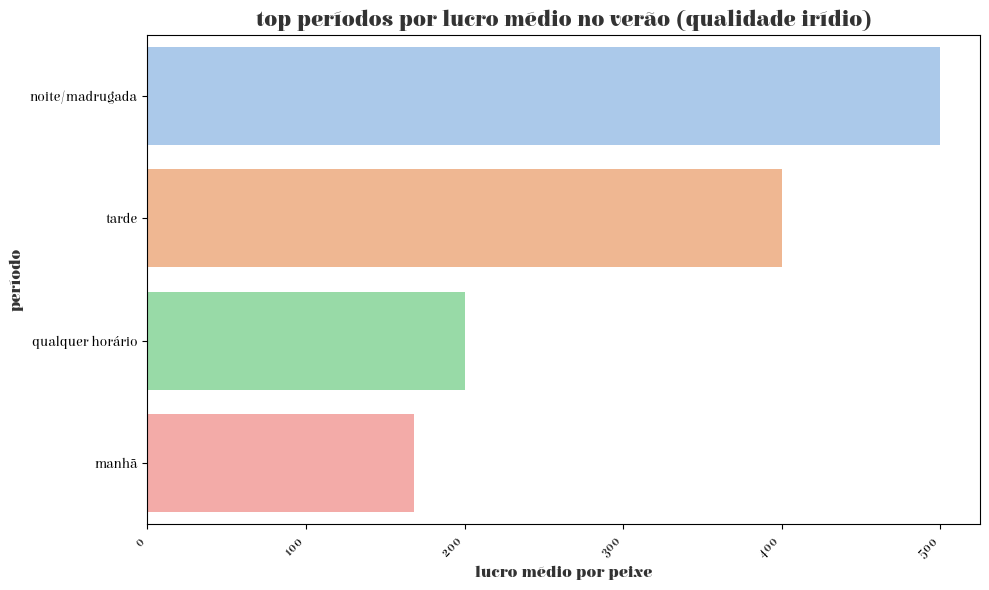

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\1352516737.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='clima', data=df_top_clima_verao, palette='pastel')


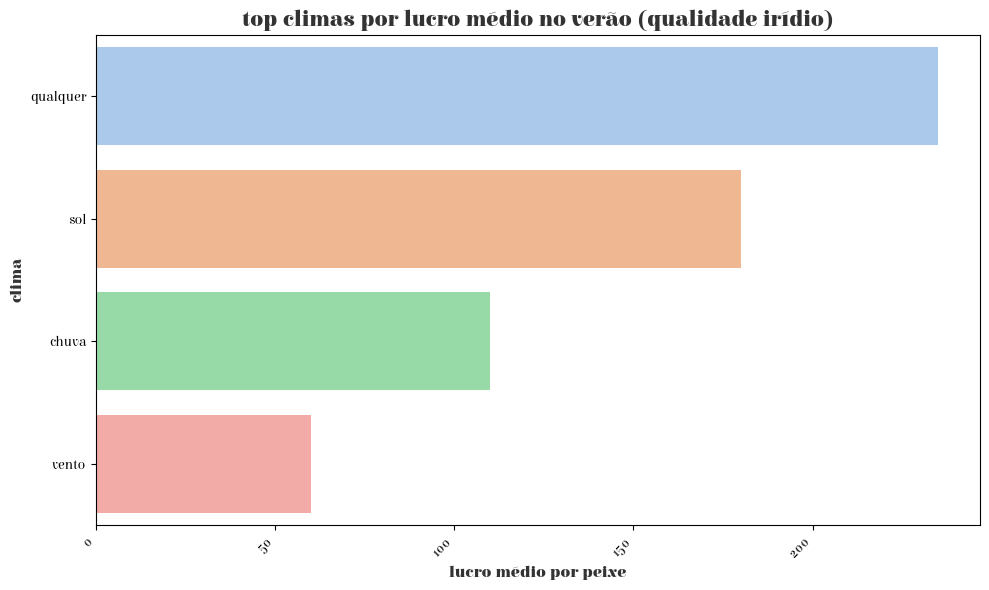

conexão SQLite fechada


In [21]:
print("\nrealizando análises e gerando visualizações...")

conn = None
try:
    conn = sqlite3.connect(caminho_banco_dados)
    print("conexão SQLite estabelecida")

    # gráfico 10: top 10 peixes mais lucrativos no verão 
    query_top_verao = "SELECT peixe, lucro_por_peixe_iridio FROM stardew_valley_pesca WHERE estacao='verão' GROUP BY peixe ORDER BY lucro_por_peixe_iridio DESC LIMIT 10"
    df_top_verao = pd.read_sql_query(query_top_verao, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_verao, palette='pastel')
    plt.title(f'top 10 peixes mais lucrativos no verão (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-10-peixes-verao.png'))
    plt.show() 

    # gráfico 11: top localizações por lucro médio no verão
    query_top_localizacao_verao = "SELECT localizacao, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='verão' GROUP BY localizacao ORDER BY lucro_medio_iridio DESC;"
    df_top_localizacao_verao = pd.read_sql_query(query_top_localizacao_verao, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='localizacao', data=df_top_localizacao_verao, palette='pastel')
    plt.title(f'top localizações por lucro médio no verão (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('localização', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-localizacoes-verao.png'))
    plt.show() 

    # gráfico 12: top períodos por lucro médio no verão
    query_top_periodo_verao = "SELECT periodo, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='verão' GROUP BY periodo ORDER BY lucro_medio_iridio DESC;"
    df_top_periodo_verao = pd.read_sql_query(query_top_periodo_verao, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='periodo', data=df_top_periodo_verao, palette='pastel')
    plt.title(f'top períodos por lucro médio no verão (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('período', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-periodos-verao.png'))
    plt.show()

    # gráfico 13: top climas por lucro médio no verão
    query_top_clima_verao = "SELECT clima, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='verão' GROUP BY clima ORDER BY lucro_medio_iridio DESC;"
    df_top_clima_verao = pd.read_sql_query(query_top_clima_verao, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='clima', data=df_top_clima_verao, palette='pastel')
    plt.title(f'top climas por lucro médio no verão (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('clima', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-climas-verao.png'))
    plt.show()

except sqlite3.Error as e:
    print(f"erro no SQLite: {e}")
except pd.errors.DatabaseError as e:
    print(f"erro ao ler do banco de dados com pandas: {e}")
except Exception as e:
    print(f"ocorreu um erro inesperado: {e}")

finally:
    if conn:
        conn.close()
        print("conexão SQLite fechada")

#### análises do outono


realizando análises e gerando visualizações...
conexão SQLite estabelecida


C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2353644343.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_outono, palette='pastel')


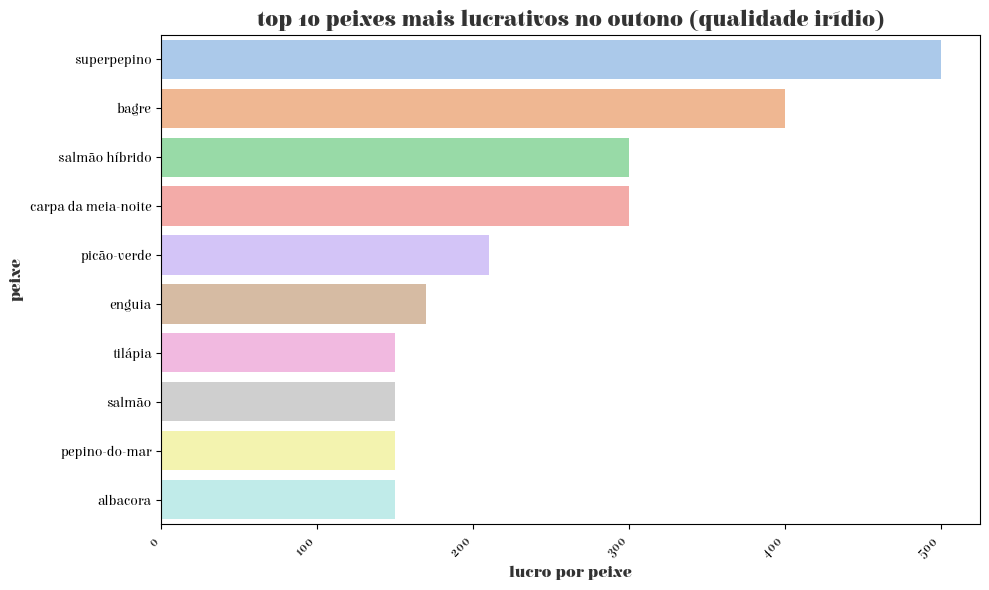

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2353644343.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='localizacao', data=df_top_localizacao_outono, palette='pastel')


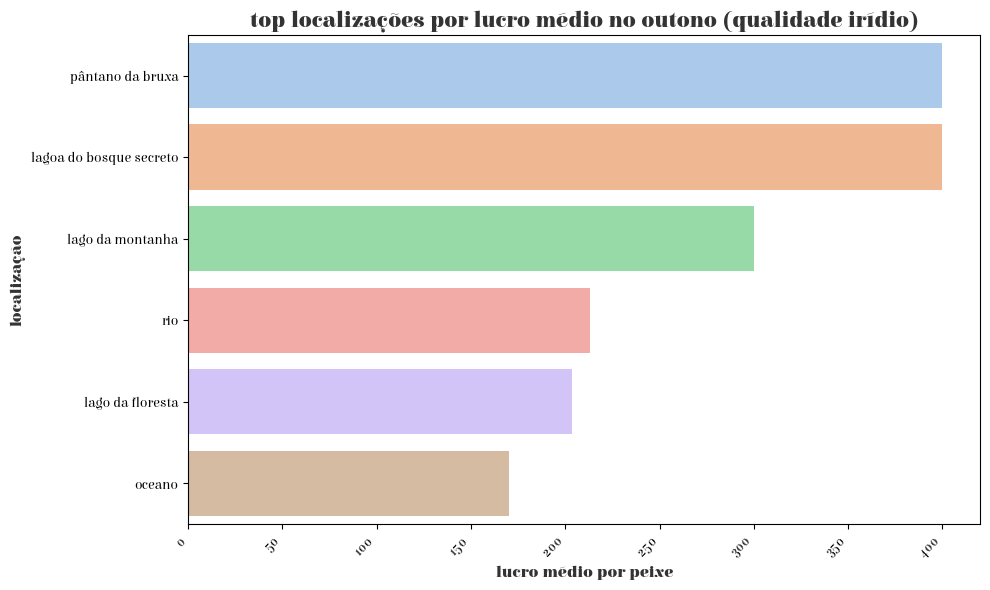

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2353644343.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='periodo', data=df_top_periodo_outono, palette='pastel')


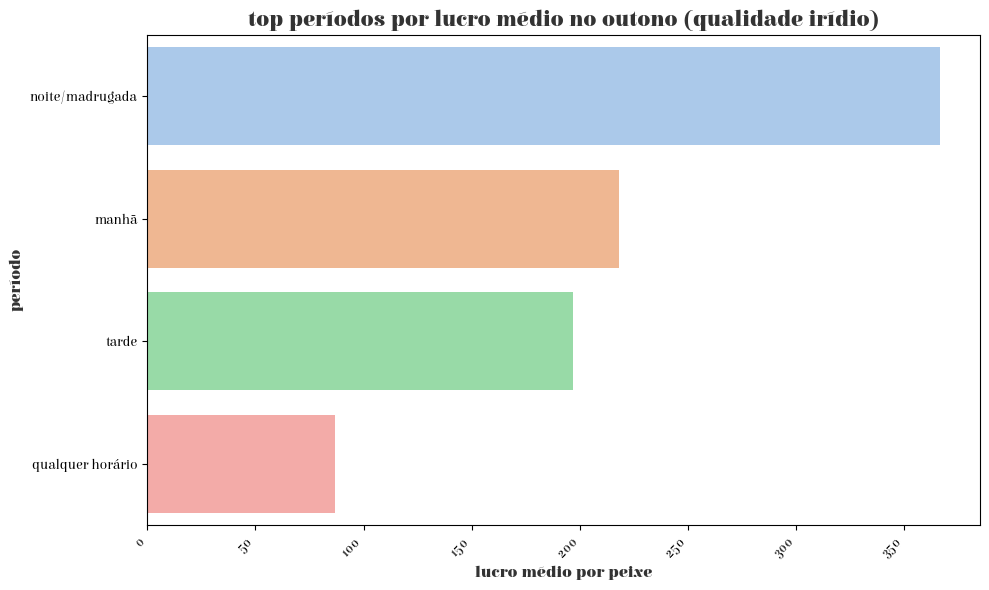

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2353644343.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='clima', data=df_top_clima_outono, palette='pastel')


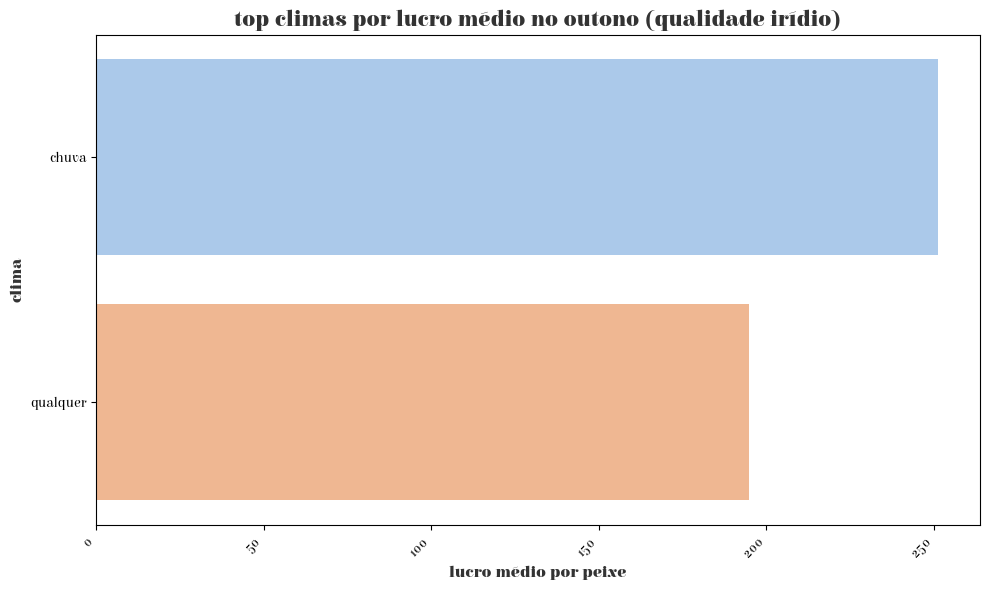

conexão SQLite fechada


In [22]:
print("\nrealizando análises e gerando visualizações...")

conn = None
try:
    conn = sqlite3.connect(caminho_banco_dados)
    print("conexão SQLite estabelecida")

    # gráfico 14: top 10 peixes mais lucrativos no outono
    query_top_outono = "SELECT peixe, lucro_por_peixe_iridio FROM stardew_valley_pesca WHERE estacao='outono' GROUP BY peixe ORDER BY lucro_por_peixe_iridio DESC LIMIT 10"
    df_top_outono = pd.read_sql_query(query_top_outono, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_outono, palette='pastel')
    plt.title(f'top 10 peixes mais lucrativos no outono (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-10-peixes-outono.png'))
    plt.show() 

    # gráfico 15: top localizações por lucro médio no outono
    query_top_localizacao_outono = "SELECT localizacao, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='outono' GROUP BY localizacao ORDER BY lucro_medio_iridio DESC;"
    df_top_localizacao_outono = pd.read_sql_query(query_top_localizacao_outono, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='localizacao', data=df_top_localizacao_outono, palette='pastel')
    plt.title(f'top localizações por lucro médio no outono (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('localização', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-localizacoes-outono.png'))
    plt.show() 

    # gráfico 16: top períodos por lucro médio no outono
    query_top_periodo_outono = "SELECT periodo, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='outono' GROUP BY periodo ORDER BY lucro_medio_iridio DESC;"
    df_top_periodo_outono = pd.read_sql_query(query_top_periodo_outono, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='periodo', data=df_top_periodo_outono, palette='pastel')
    plt.title(f'top períodos por lucro médio no outono (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('período', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-periodos-outono.png'))
    plt.show()

    # gráfico 17: top climas por lucro médio no outono  
    query_top_clima_outono = "SELECT clima, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='outono' GROUP BY clima ORDER BY lucro_medio_iridio DESC;"
    df_top_clima_outono = pd.read_sql_query(query_top_clima_outono, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='clima', data=df_top_clima_outono, palette='pastel')
    plt.title(f'top climas por lucro médio no outono (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('clima', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-climas-outono.png'))
    plt.show()

except sqlite3.Error as e:
    print(f"erro no SQLite: {e}")
except pd.errors.DatabaseError as e:
    print(f"erro ao ler do banco de dados com pandas: {e}")
except Exception as e:
    print(f"ocorreu um erro inesperado: {e}")

finally:
    if conn:
        conn.close()
        print("conexão SQLite fechada")

#### análises do inverno


realizando análises e gerando visualizações...
conexão SQLite estabelecida


C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2770295639.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_inverno, palette='pastel')


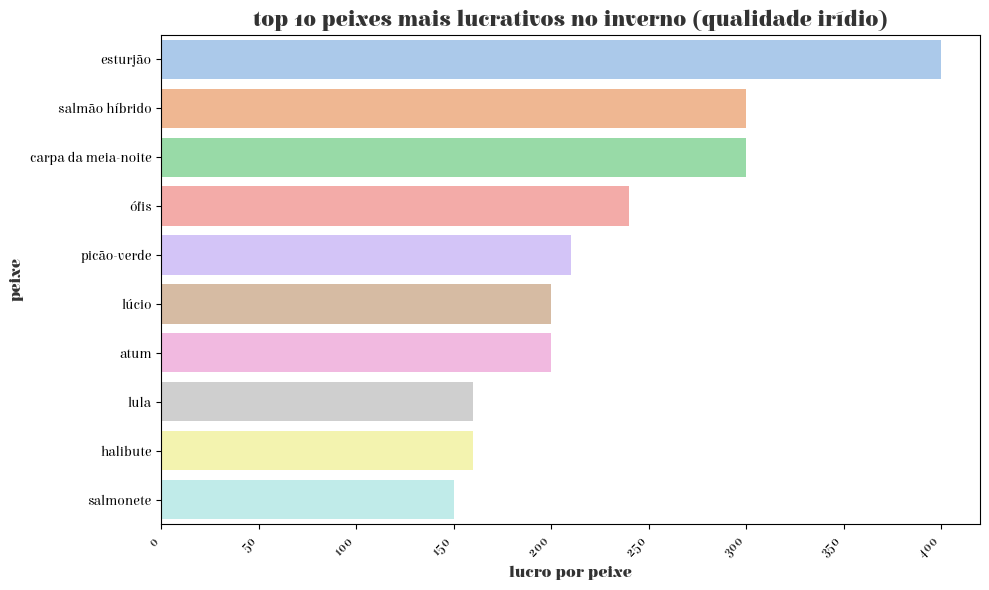

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2770295639.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='localizacao', data=df_top_localizacao_inverno, palette='pastel')


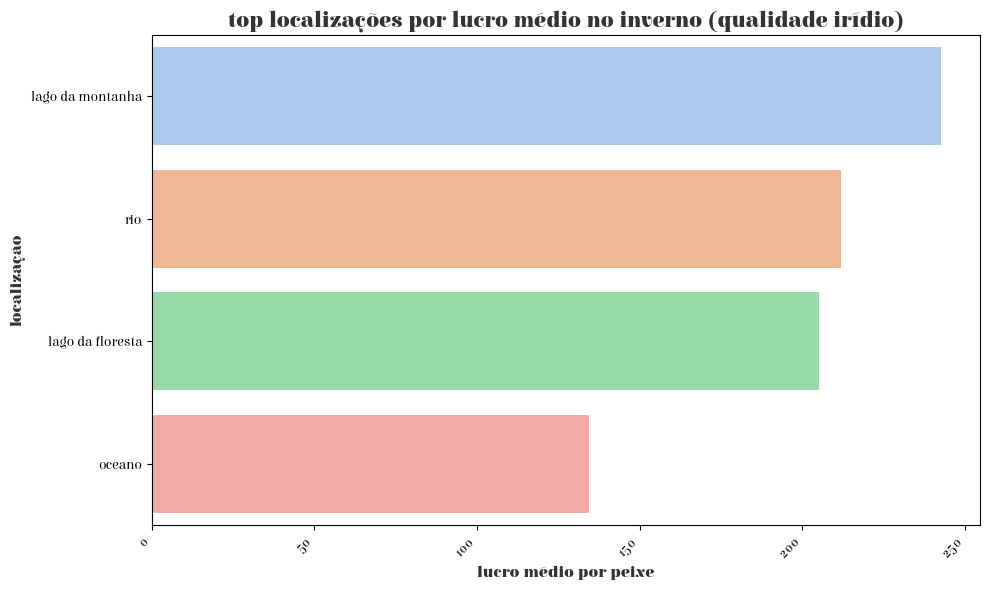

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2770295639.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='periodo', data=df_top_periodo_inverno, palette='pastel')


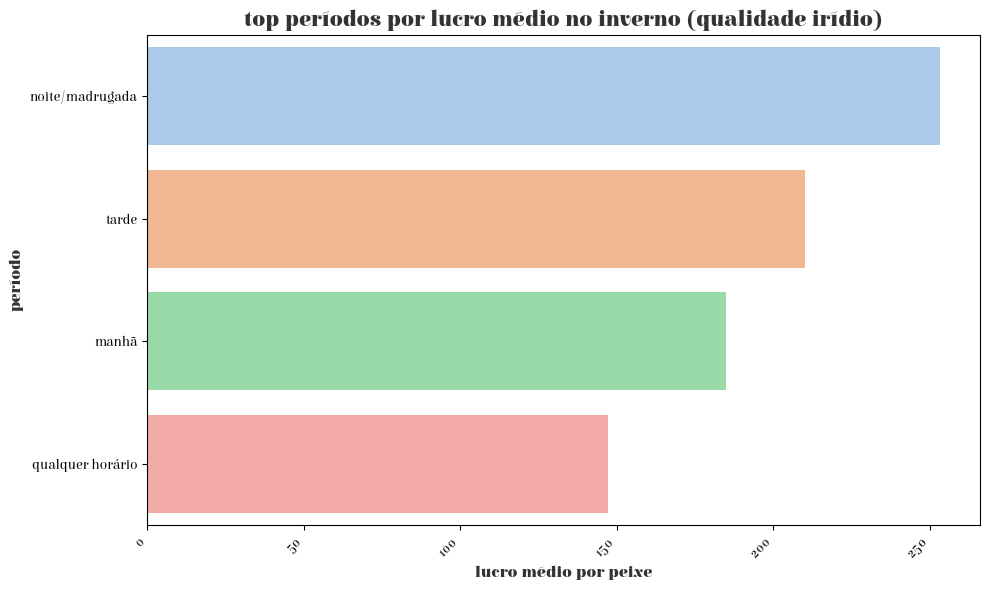

C:\Users\giovanna\AppData\Local\Temp\ipykernel_3480\2770295639.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lucro_medio_iridio', y='clima', data=df_top_clima_inverno, palette='pastel')


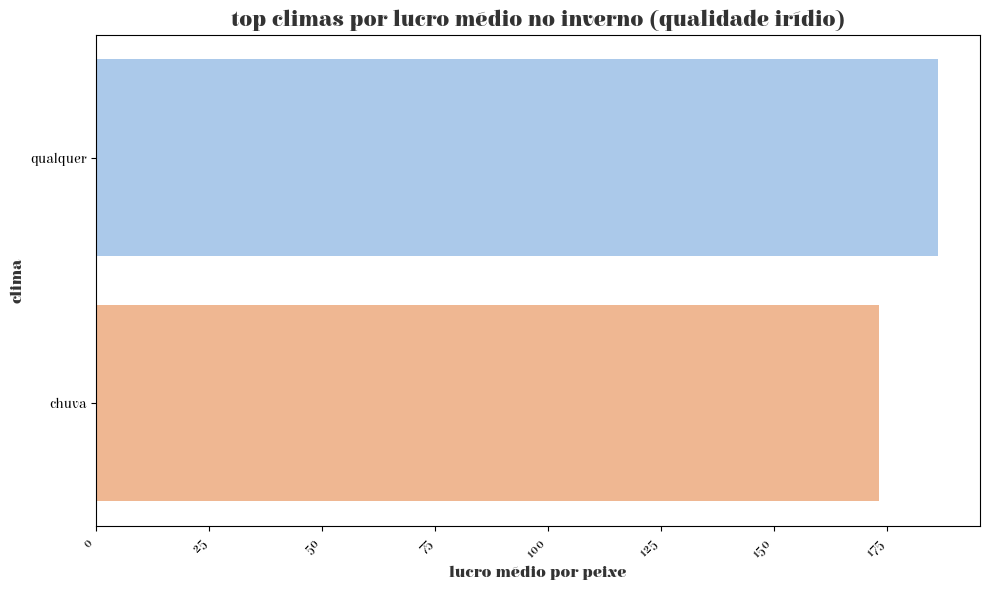

conexão SQLite fechada


In [23]:
print("\nrealizando análises e gerando visualizações...")

conn = None
try:
    conn = sqlite3.connect(caminho_banco_dados)
    print("conexão SQLite estabelecida")

    # gráfico 18: top 10 peixes mais lucrativos no inverno
    query_top_inverno = "SELECT peixe, lucro_por_peixe_iridio FROM stardew_valley_pesca WHERE estacao='inverno' GROUP BY peixe ORDER BY lucro_por_peixe_iridio DESC LIMIT 10"
    df_top_inverno = pd.read_sql_query(query_top_inverno, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_por_peixe_iridio', y='peixe', data=df_top_inverno, palette='pastel')
    plt.title(f'top 10 peixes mais lucrativos no inverno (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-10-peixes-inverno.png'))
    plt.show() 

    # gráfico 19: top localizações por lucro médio no inverno
    query_top_localizacao_inverno = "SELECT localizacao, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='inverno' GROUP BY localizacao ORDER BY lucro_medio_iridio DESC;"
    df_top_localizacao_inverno = pd.read_sql_query(query_top_localizacao_inverno, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='localizacao', data=df_top_localizacao_inverno, palette='pastel')
    plt.title(f'top localizações por lucro médio no inverno (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('localização', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-localizacoes-inverno.png'))
    plt.show() 

    # gráfico 20: top períodos por lucro médio no inverno
    query_top_periodo_inverno = "SELECT periodo, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='inverno' GROUP BY periodo ORDER BY lucro_medio_iridio DESC;"
    df_top_periodo_inverno = pd.read_sql_query(query_top_periodo_inverno, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='periodo', data=df_top_periodo_inverno, palette='pastel')
    plt.title(f'top períodos por lucro médio no inverno (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('período', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-periodos-inverno.png'))
    plt.show()

    # gráfico 21: top climas por lucro médio no inverno
    query_top_clima_inverno = "SELECT clima, AVG(lucro_por_peixe_iridio) AS lucro_medio_iridio FROM stardew_valley_pesca WHERE estacao='inverno' GROUP BY clima ORDER BY lucro_medio_iridio DESC;"
    df_top_clima_inverno = pd.read_sql_query(query_top_clima_inverno, conn)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='lucro_medio_iridio', y='clima', data=df_top_clima_inverno, palette='pastel')
    plt.title(f'top climas por lucro médio no inverno (qualidade irídio)', fontfamily='Elsie', fontsize='16', fontweight='bold', color='#333')
    plt.xlabel('lucro médio por peixe', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.ylabel('clima', fontfamily='Elsie', fontsize='12', fontweight='bold', color='#333')
    plt.xticks(rotation=45, ha='right', fontfamily='Elsie')
    plt.yticks(fontfamily='Elsie')
    plt.tight_layout()
    plt.savefig(os.path.join(caminho_pasta_graficos_pesca, 'top-climas-inverno.png'))
    plt.show()

except sqlite3.Error as e:
    print(f"erro no SQLite: {e}")
except pd.errors.DatabaseError as e:
    print(f"erro ao ler do banco de dados com pandas: {e}")
except Exception as e:
    print(f"ocorreu um erro inesperado: {e}")

finally:
    if conn:
        conn.close()
        print("conexão SQLite fechada")